**Week** - 2 

-----


**Domain** - E-Commerce  
 
**Business Use-Case** - The client wants to build a solution that segregates customers into segments based on customer-specific attributes like Gender, Age, Location, Income, etc. This solution will be helpful in building target-specific market strategies and improving customer satisfaction.      

**Task** - Perform EDA, Feature Engineering, and Dimensionality Reduction on the customer base. Train a Clustering Model (k-Means/ Hierarchical) using scikit-learn and visualize the clusters.  


#### Importing the Python Libraries   

First of all, we need to import all the libraries that are required for the analysis, namely Pandas for handling data, Numpy for numerical calculations, Matplotlib and Seaborn for visualization.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [2]:
df = pd.read_csv('Mall_Customers.csv')


## Structured Based Data Exploration  
This is the first part of EDA where the data frame is evaluated for structure, columns and data types. The goal of this step is to get a general understanding of the dataset.  
#### Display the first 5 Observations

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Display the Last 5 Observations

In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


#### Display the Number of Variables and Observations    
This can be done with df.shape which gives the output as a tuple having 2 values. The first value counts the number of data points and the second value represents the number of features in the dataset.

In [5]:
df.shape

(200, 5)

In this dataframe, there are 200 rows and 5 columns

#### Display the Variable Names and their Data Types

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### Count the number of Non-Missing Values for each variable   
isnull() show if there is null value or not and sum() counts the number of non-empty values. It gives the idea of missing values in our dataset

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Descriptive Statistics   
Now to know more about the characteristics of the dataset we will use the df.describe() which by default gives statistical information of all numerical features in our data frame.

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Display the Complete Summary of the Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data Visualization

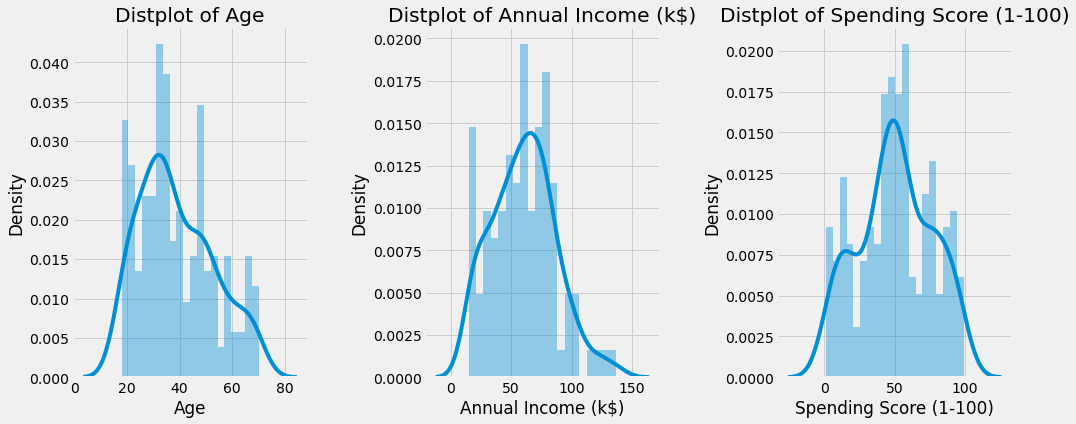

In [11]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

#### Display a frequency distribution of Gender   
The plot shows a class imbalance of the data between male and Female .

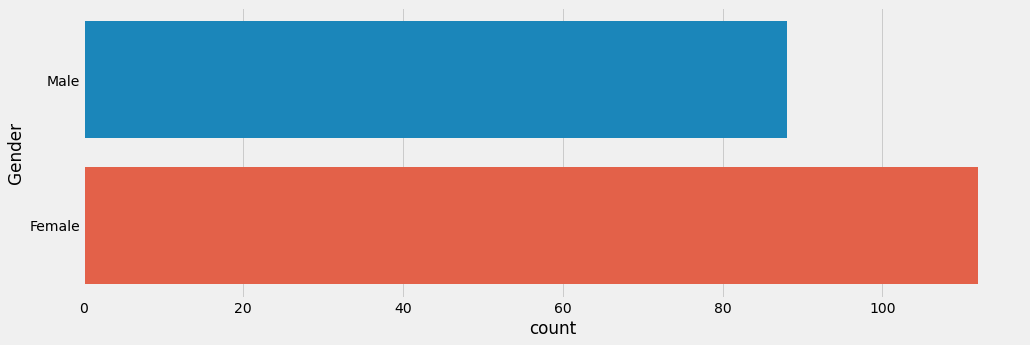

In [12]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

 #### Correlation between all the columns of a dataframe    
 We can also get the correlation between all the columns of a dataframe. For this, apply the corr() function on the entire dataframe which will result in a dataframe of pair-wise correlation values between all the columns.

In [13]:
print(df.corr())

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


When applied to an entire dataframe, the corr() function returns a dataframe of pair-wise correlation between the columns. We can see that there’s a weak negative correlation . Also, notice that the values on the diagonal are 1s, this is because each column is perfectly correlated with itself.

As we can see that none of features ka highly correlated so we cannot drop any column

each category value is converted into a new column and assigned a 1 or 0

In [14]:
x = df.iloc[:,[3,4]].values

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder = 'passthrough')
df=ct.fit_transform(df) 

#### Data Standardization   
Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.



In [16]:
# # define standard scaler
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(df)

In [17]:
# pca = PCA(n_components=2)
# pca.fit(df)
# pca_df = pca.transform(df)

In [18]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Clustering is an unsupervised machine learning technique. It is the process of division of the dataset into groups in which the members in the same group possess similarities in features. The commonly used clustering algorithms are K-Means clustering, Hierarchical clustering, Density-based clustering, Model-based clustering, etc

#### K-Means Clustering
It is the simplest and commonly used iterative type unsupervised learning algorithm. In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method which will be discussed later in this article ) and iterates these centroids until no change happens to the position of the centroid.

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is **Elbow Method**.    
#### Elbow Method   
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

Text(0, 0.5, 'DataPoints')

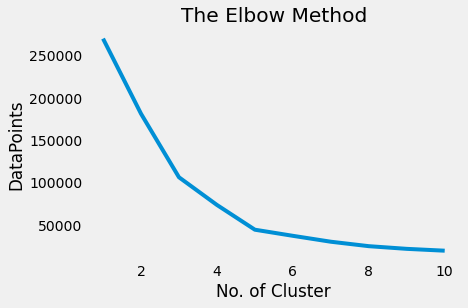

In [21]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.grid()
plt.xlabel("No. of Cluster")
plt.ylabel("DataPoints")

The point at which the elbow shape is created is 5, that is, our K value or an optimal number of clusters is 5. Now let’s train the model on the dataset with a number of clusters 5.

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [23]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


#### Visualising the clusters

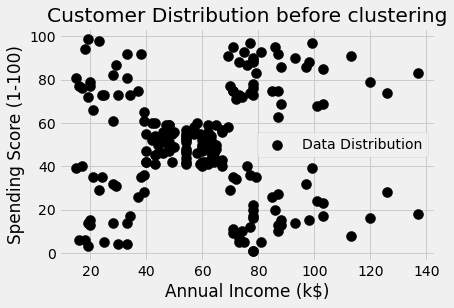

In [24]:

plt.scatter(x[:,0], x[:,1], s = 100, c = 'black', label = 'Data Distribution')
plt.title('Customer Distribution before clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [25]:
frame = pd.DataFrame(x)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster, dtype: int64

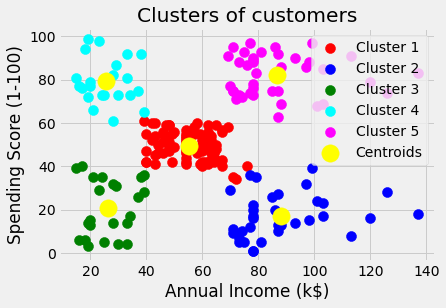

In [28]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans== 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [30]:
Annual_Income =  int(input("Annual_Income"))
Spending_Score = int(input("Spending_Score"))

predict= kmeans.predict([[ Annual_Income,Spending_Score ]])
print(predict)
if predict==[0]:
  print("Customer is careless")

elif predict==[1]:
  print("Customer is standard")
elif predict==[2]:
  print("Customer is Target")
elif predict==[3]:
  print("Customer is careful")

else:
  print("Custmor is sensible" )

Annual_Income346
Spending_Score5467
[4]
Custmor is sensible
